## VISUALIZACIÓN Y ANALISIS

#### 1. Importamos las librerías que utilizaremos

In [10]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import seaborn as sns

#### 1. Importamos los data sets

In [4]:
temc = pd.read_csv('/home/julian/Cursos/Ironhack/Proyectos/Proyecto2/P2-Pipelines/temc')

In [5]:
co2 = pd.read_csv('/home/julian/Cursos/Ironhack/Proyectos/Proyecto2/P2-Pipelines/co2')

In [6]:
tyc = pd.read_csv('/home/julian/Cursos/Ironhack/Proyectos/Proyecto2/P2-Pipelines/tyc') 

In [7]:
volat = pd.read_csv('/home/julian/Cursos/Ironhack/Proyectos/Proyecto2/P2-Pipelines/volat') 

In [8]:
hm = pd.read_csv('/home/julian/Cursos/Ironhack/Proyectos/Proyecto2/P2-Pipelines/hm') 

In [17]:
cco2 = pd.read_csv('/home/julian/Cursos/Ironhack/Proyectos/Proyecto2/P2-Pipelines/cco2')

### GRAFICOS

#### 1. Definimos los parámetros generales de nuestros gráficos

In [13]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (20.,8.)})
sns.set_style("whitegrid")

#### DIÓXIDO DE CARBONO (2011-2021)

#### En el siguiente gráfico se puede observar el progresivo aumento de los niveles de co2 en la atmósfera durante el período mencionado. Los niveles están expresados como una medida de la proporción entre moléculas de co2 y de aire seco. 

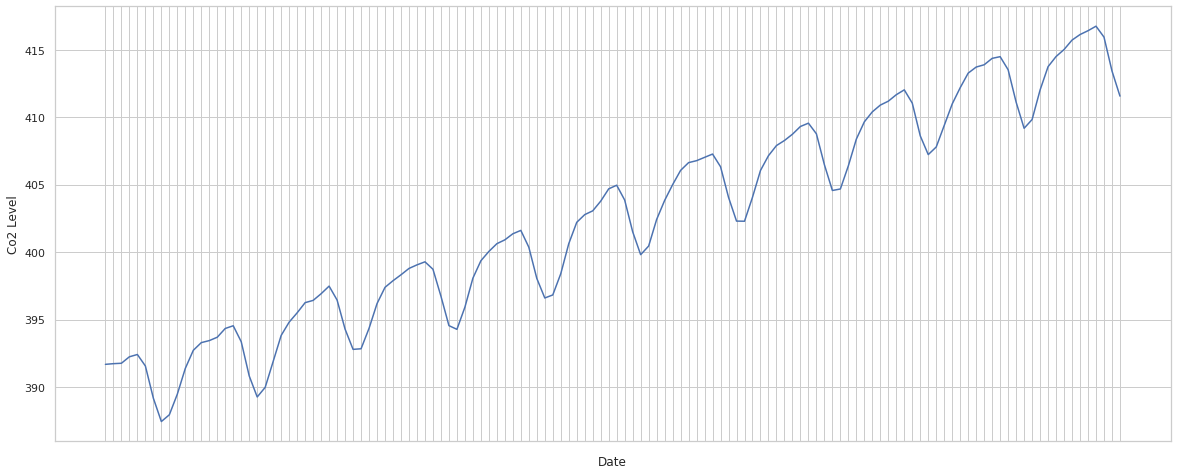

In [14]:
c = sns.lineplot(data=co2, x="Date", y="Co2 Level").set_xticklabels(labels=[], rotation=75);

#### TEMPERATURAS MENSUALES (2012 - 2017)

#### A continuación podemos ver la evolución temporal de las temperaturas mensuales de cinco grandes ciudades de EEUU y Canadá. Se puede ver la estacionalidad de las mismas, pero el gráfico no presenta una tendencia clara de aumento. 

<ipython-input-15-93ef3071cb36>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.lineplot(x="Date", y="Los Angeles", data=temc, ax=axs[4]).set_xticklabels(labels=temc["Date"], rotation=60);


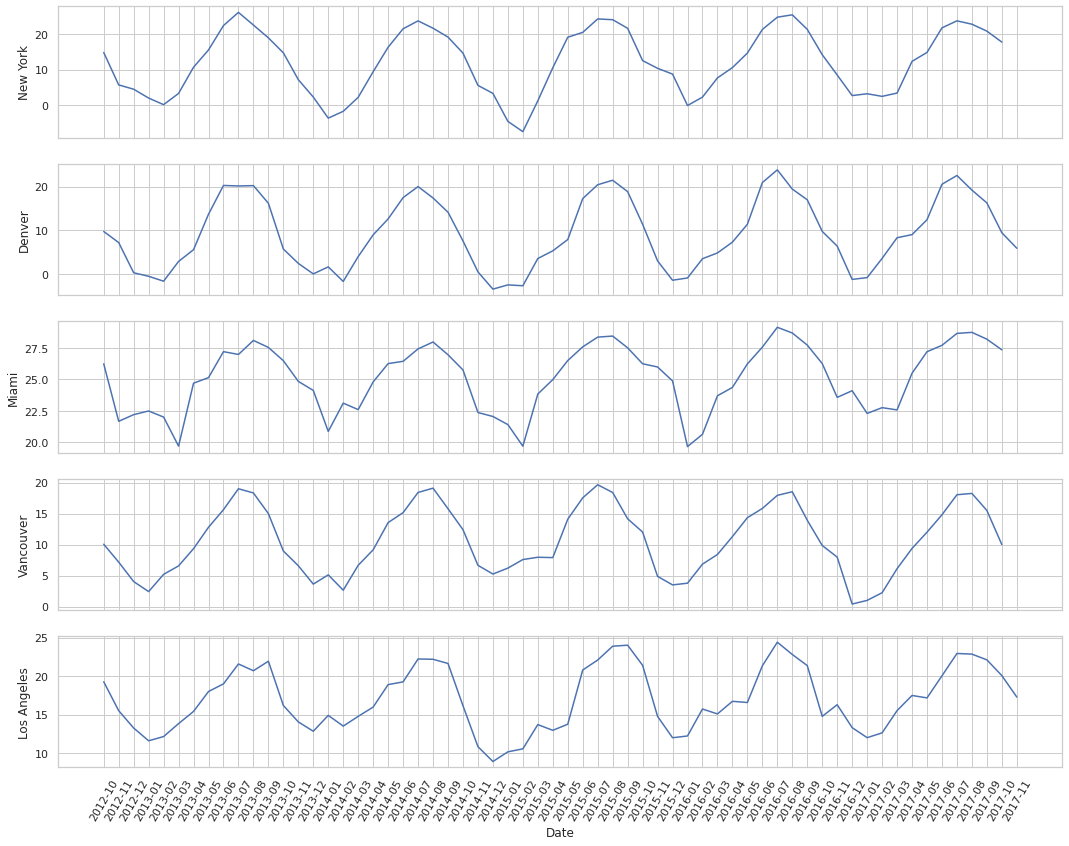

In [15]:
fig, axs = plt.subplots(nrows=5, ncols=1, sharex=True, figsize=(18, 14))
sns.lineplot(x="Date", y="New York", data=temc, ax=axs[0])
sns.lineplot(x="Date", y="Denver", data=temc, ax=axs[1])
sns.lineplot(x="Date", y="Miami", data=temc, ax=axs[2])
sns.lineplot(x="Date", y="Vancouver", data=temc, ax=axs[3])
sns.lineplot(x="Date", y="Los Angeles", data=temc, ax=axs[4]).set_xticklabels(labels=temc["Date"], rotation=60);

#### VARIABILIDAD MENSUAL DE LAS TEMPERATURAS VS EVOLUCIÓN DEL CO2 (2012-2017)

#### Sin embargo, si graficamos la variabilidad mensual de las temperaturas junto con la evolución temporal del co2, se puede ver como en los periodos donde aumenta el co2, la variabilidad de las temperaturas aumenta.

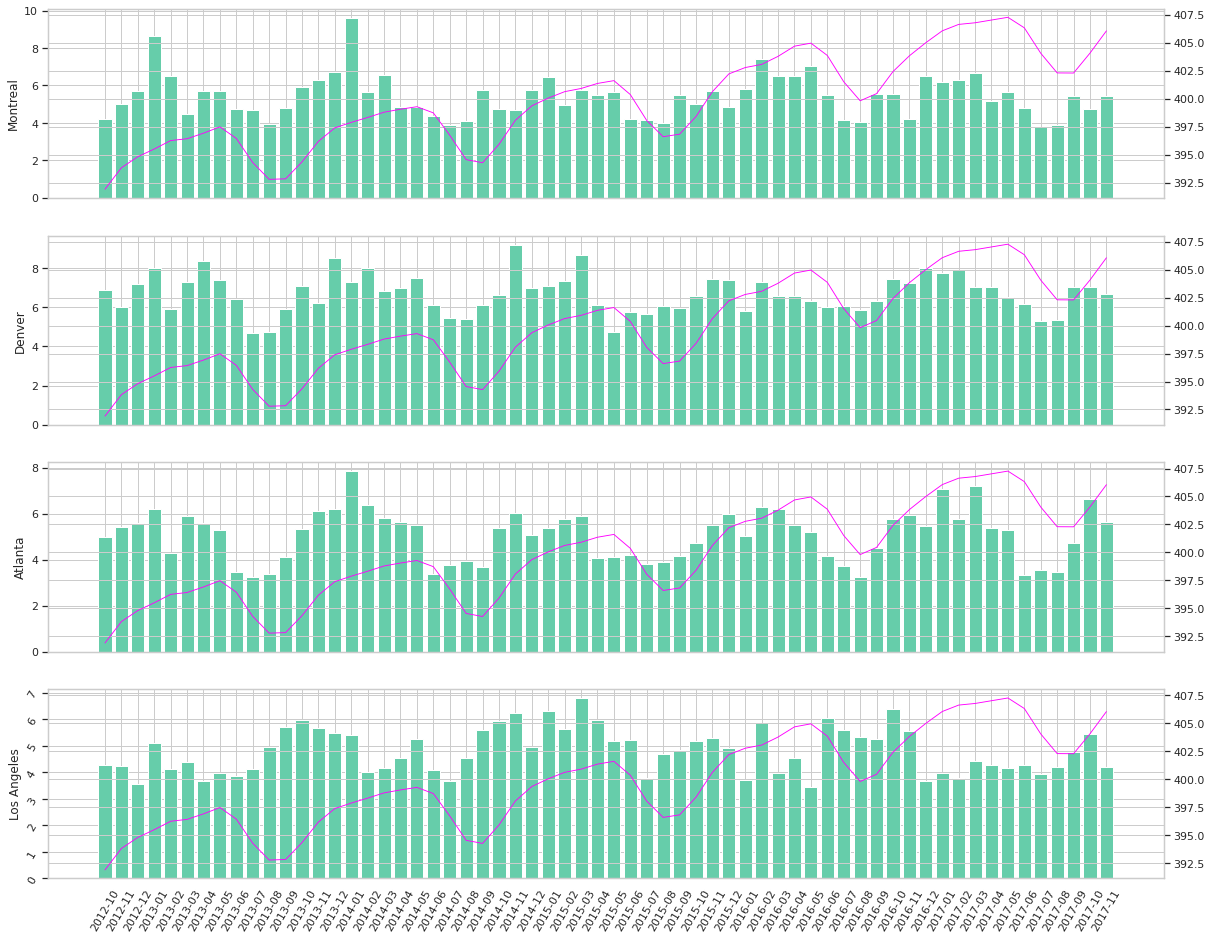

In [18]:
fig, ((x1, x2, x3, x4)) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(20, 16))

x1.bar(volat.Date, volat.Montreal, color="mediumaquamarine")
x1.set_ylabel('Montreal')
x2.bar(volat.Date, volat.Denver, color="mediumaquamarine")
x2.set_ylabel('Denver')
x3.bar(volat.Date, volat.Atlanta, color="mediumaquamarine")
x3.set_ylabel('Atlanta')
x4.bar(volat.Date, volat['Los Angeles'], color="mediumaquamarine")
x4.set_ylabel('Los Angeles')

b = x1.twinx()
b.plot(cco2.Date, cco2['Co2 Level'], linewidth = 0.9, color="fuchsia")

b = x2.twinx()
b.plot(cco2.Date, cco2['Co2 Level'], linewidth = 0.9, color="fuchsia")

b = x3.twinx()
b.plot(cco2.Date, cco2['Co2 Level'], linewidth = 0.9, color="fuchsia")

b = x4.twinx()
b.plot(cco2.Date, cco2['Co2 Level'], linewidth = 0.9, color="fuchsia")

x4.tick_params(labelrotation=60);

#### CORRELACIÓN NEGATIVA ENTRE TEMPERATURAS Y CO2 

#### Por otro lado, a partir de la correlación entre las temperaturas y el co2, se puede observar una clara relación inversa entre las dos variables.

<AxesSubplot:>

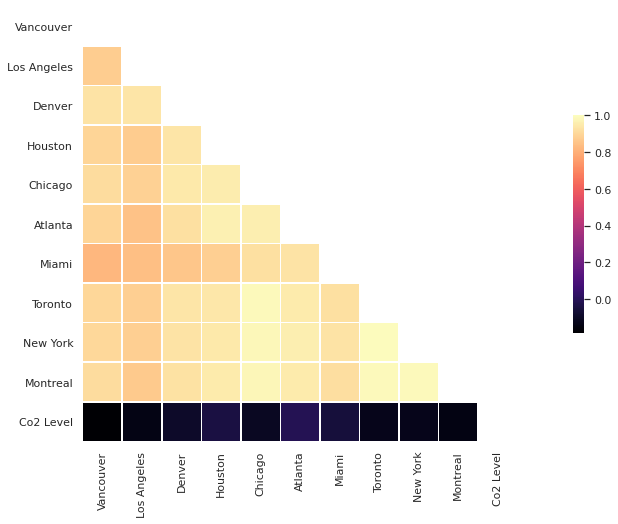

In [26]:
tro = tyc.corr()
mascara = np.triu(np.ones_like(tro, dtype=bool)) # generamos la máscara para la triangular superior
color_map = sns.diverging_palette(0, 10, as_cmap=True) # paleta de colores


sns.heatmap(tro, 
            mask=mascara,
            cmap="magma",
            vmax=1,
            square=True, 
            linewidth=.5, 
            cbar_kws={"shrink": .5})

#### EVOLUCIÓN TEMPORAL DEL CO2 CON TEMPERATURAS (ESTACIONALIDAD)

#### Más aún, si graficamos la evolución de los niveles de co2 superponiéndolos con los datos de las temperaturas, se puede ver la relación estacional de ambos, durante el invierno los niveles de co2 aumentan, y durante el verano descienden, al margen de la tendencia positiva del co2. Esta dinámica muestra el rol de los bosques, en este caso del América del Norte, en los niveles de co2, durante el otoño-invierno, los bosques disminuyen la absorción del co2 , y durante la primavera-verano, consumen más co2.

<ipython-input-36-3fb48b5b7f5c>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.scatterplot(x="Date", y="Co2 Level", hue="Los Angeles", data=tyc, size="Los Angeles", sizes=(40, 80), ax=axs[3]).set_xticklabels(labels=tyc["Date"], rotation=60);


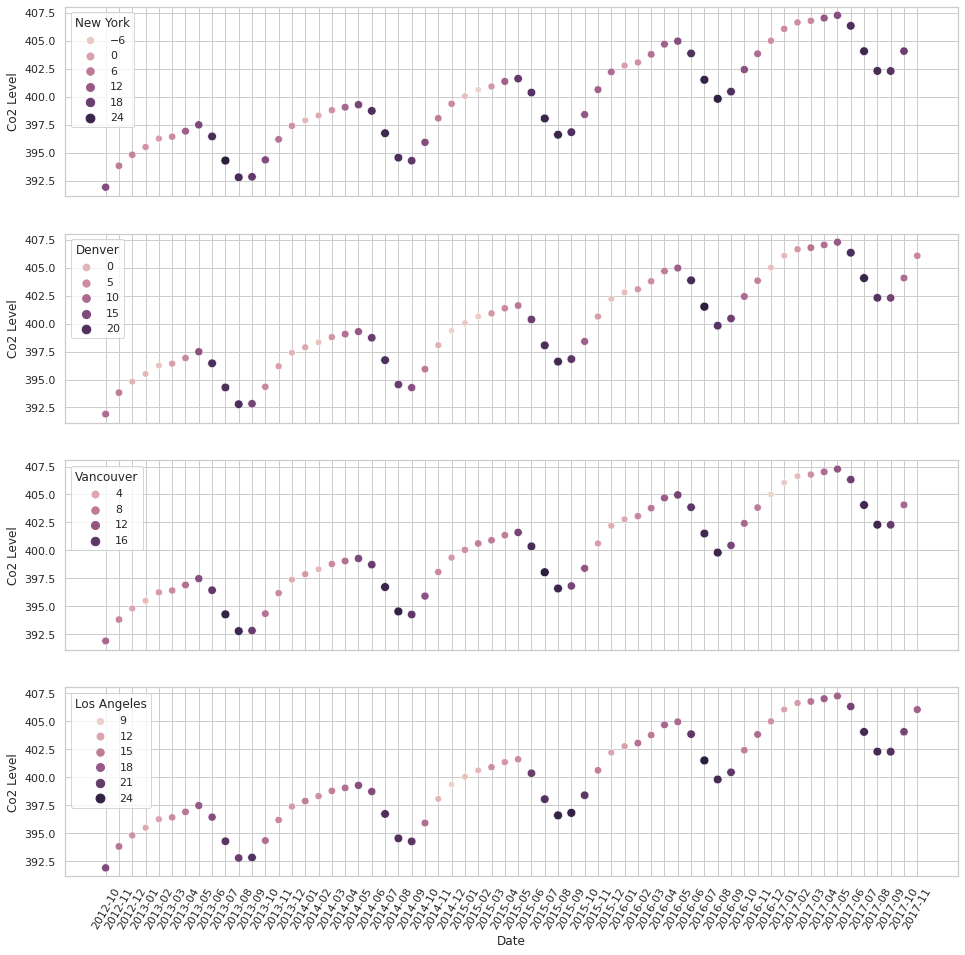

In [36]:
fig, axs = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(16, 16))
sns.scatterplot(x="Date", y="Co2 Level", hue="New York", data=tyc, size="New York", sizes=(40, 80), ax=axs[0])
sns.scatterplot(x="Date", y="Co2 Level", hue="Denver", data=tyc, size="Denver", sizes=(40, 80), ax=axs[1])
sns.scatterplot(x="Date", y="Co2 Level", hue="Vancouver", data=tyc, size="Vancouver", sizes=(40, 80), ax=axs[2])
sns.scatterplot(x="Date", y="Co2 Level", hue="Los Angeles", data=tyc, size="Los Angeles", sizes=(40, 80), ax=axs[3]).set_xticklabels(labels=tyc["Date"], rotation=60);

#### NIVELES MENSUALES DE HUMEDAD VS CO2  (2012-2017)

#### Con respecto a la relacion entre los niveles de humedad y co2, parecería haber una relación inversa entre ambas, aumentos en los niveles de humedad coincidentes con los descensos estivales en los niveles de co2. 

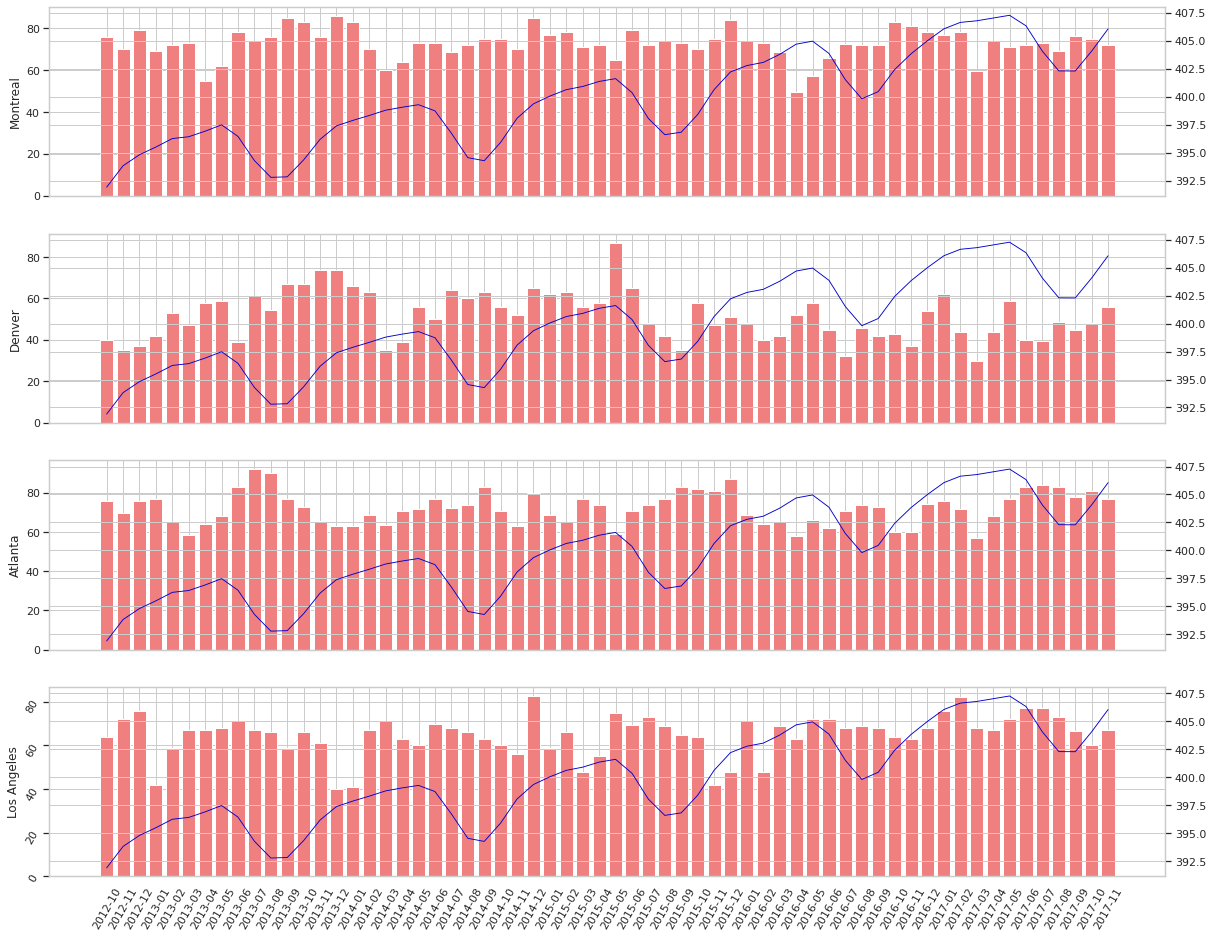

In [35]:
fig, ((x1, x2, x3, x4)) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(20, 16))

x1.bar(hm.Date, hm.Montreal, color="lightcoral")
x1.set_ylabel('Montreal')
x2.bar(hm.Date, hm.Denver, color="lightcoral")
x2.set_ylabel('Denver')
x3.bar(hm.Date, hm.Atlanta, color="lightcoral")
x3.set_ylabel('Atlanta')
x4.bar(hm.Date, hm['Los Angeles'], color="lightcoral")
x4.set_ylabel('Los Angeles')

b = x1.twinx()
b.plot(cco2.Date, cco2['Co2 Level'], linewidth = 0.9, color="mediumblue")

b = x2.twinx()
b.plot(cco2.Date, cco2['Co2 Level'], linewidth = 0.9, color="mediumblue")

b = x3.twinx()
b.plot(cco2.Date, cco2['Co2 Level'], linewidth = 0.9, color="mediumblue")

b = x4.twinx()
b.plot(cco2.Date, cco2['Co2 Level'], linewidth = 0.9, color="mediumblue")

x4.tick_params(labelrotation=60);